Loading datasets...
Datasets loaded successfully.

Cleaning and preparing data...
Date columns converted.

Aggregating historical data by Account and Date...
Aggregation complete.

Merging datasets...
Merge successful. Final DataFrame shape: (2341, 7) 

Starting analysis...
--- Average Daily PnL by Market Sentiment Classification ---
classification
Fear             5328.818161
Extreme Greed    5161.922644
Extreme Fear     4619.439053
Neutral          3438.618818
Greed            3318.100730
Name: Total_PnL, dtype: float64

Insight: Traders performed best during 'Fear' and 'Extreme Greed' periods.

Generating scatter plot for PnL vs. Sentiment Value...


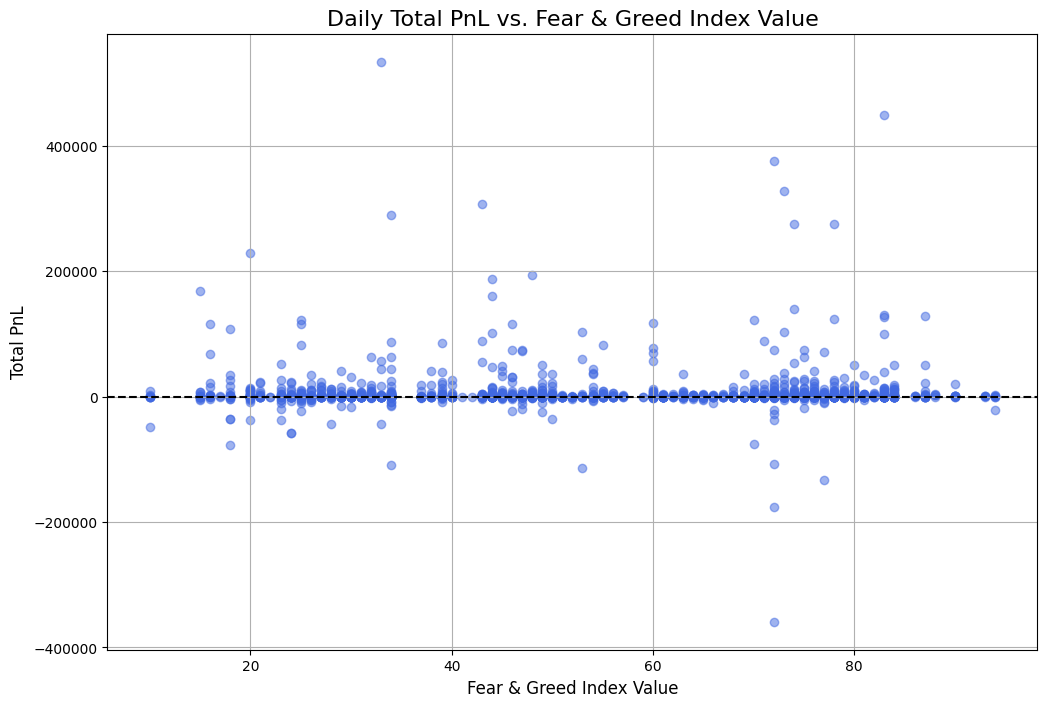

The insights can be used to form strategic trading conclusions.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print("Loading datasets...")
try:
    df_historical = pd.read_csv('historical_data.csv')
    df_fear_greed = pd.read_csv('fear_greed_index.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the files are in the same directory as the script.")
    exit()

print("Datasets loaded successfully.\n")

print("Cleaning and preparing data...")
df_historical['Timestamp IST'] = pd.to_datetime(df_historical['Timestamp IST'], dayfirst=True)
df_historical['Date'] = df_historical['Timestamp IST'].dt.date
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])

df_historical['Date'] = pd.to_datetime(df_historical['Date'])
print("Date columns converted.\n")


print("Aggregating historical data by Account and Date...")
daily_trader_performance = df_historical.groupby(['Account', 'Date']).agg(
    Total_PnL=('Closed PnL', 'sum'),
    Number_of_Trades=('Trade ID', 'count')
).reset_index()
print("Aggregation complete.\n")

print("Merging datasets...")
merged_df = pd.merge(
    daily_trader_performance,
    df_fear_greed,
    left_on='Date',
    right_on='date',
    how='left'
)

merged_df = merged_df.drop('date', axis=1)
print("Merge successful. Final DataFrame shape:", merged_df.shape, "\n")


print("Starting analysis...")

performance_by_sentiment = merged_df.groupby('classification')['Total_PnL'].mean().sort_values(ascending=False)
print("--- Average Daily PnL by Market Sentiment Classification ---")
print(performance_by_sentiment)
print("\nInsight: Traders performed best during 'Fear' and 'Extreme Greed' periods.\n")

print("Generating scatter plot for PnL vs. Sentiment Value...")
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['value'], merged_df['Total_PnL'], alpha=0.5, color='royalblue')
plt.title('Daily Total PnL vs. Fear & Greed Index Value', fontsize=16)
plt.xlabel('Fear & Greed Index Value', fontsize=12)
plt.ylabel('Total PnL', fontsize=12)
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.show()

print("The insights can be used to form strategic trading conclusions.")